In [443]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
import seaborn as sns
import pandas as pd

In [444]:
import os
print(os.getcwd())

d:\Documents\OISP\specialized_project\website-crawler-service\website_scraper\models


In [445]:
df = pd.read_csv('../mogi_after_parsing.csv')
df.head()

,title,description,property_type,transaction_type,price,province,district,ward,street,location_latitude,location_longitude,owner_name,owner_contact,area,bedrooms,bathrooms
0,"Giá chỉ từ 131k/ngày - đầy đủ tiện nghi, không...","Đầy đủ tiện ích, chất lượng 5 sao cùng MM_Hous...",room,rent,3.95,TPHCM,Quận 8,Phường 2,Nguyễn Thị Tần,106.686146,10.745877,MM House,968503803,280.0,0,0
1,Phòng trọ mới 30m2 Full nội thất xịn - Giá cực...,Phòng trọ mới 30m2 Full nội thất xịn - Giá cực...,room,rent,5.00,TPHCM,Quận Gò Vấp,Phường 14,Phạm Văn Chiêu,106.644039,10.845728,Nguyễn Đăng Anh,986397782,30.0,0,0
2,"P 2.5tr giảm còn 2tr, full NT gần vivo city, s...",cho thuê một phòng trong căn hộ Hoàng Anh Gia ...,room,rent,2.00,TPHCM,Quận 7,Phường Tân Phong,Nguyễn Hữu Thọ,106.705338,10.729381,Nguyễn Thái,903758676,12.0,0,0
3,"Cho thuê Duplex mới xây ở Phạm Văn Chí, Quận 6","Cho thuê Duplex mới xây ở Phạm Văn Chí, Quận 6...",room,rent,3.80,TPHCM,Quận 6,Phường 3,Phạm Văn Chí,106.646393,10.742794,Nguyễn Thúy,876306552,25.0,0,0
4,Phòng như căn hộ 1 trệt + 1 lầu gác cao 1124/2...,+ Thông tin chi tiết: Phòng như Căn hộ mini có...,room,rent,2.90,TPHCM,Quận Gò Vấp,Phường 13,Lê Đức Thọ,106.657982,10.855271,Lê Huy Hoàng,937554570,25.0,0,0


# Data exploration

In [446]:
df.drop(['bedrooms', 'bathrooms', 'title', 'description', 'transaction_type', 'owner_name', 'owner_contact', 'property_type', 'street'], axis=1, inplace=True)
df.head()

,price,province,district,ward,location_latitude,location_longitude,area
0,3.95,TPHCM,Quận 8,Phường 2,106.686146,10.745877,280.0
1,5.00,TPHCM,Quận Gò Vấp,Phường 14,106.644039,10.845728,30.0
2,2.00,TPHCM,Quận 7,Phường Tân Phong,106.705338,10.729381,12.0
3,3.80,TPHCM,Quận 6,Phường 3,106.646393,10.742794,25.0
4,2.90,TPHCM,Quận Gò Vấp,Phường 13,106.657982,10.855271,25.0


In [447]:
df.shape

(7467, 7)

In [448]:
df.keys()

Index(['price', 'province', 'district', 'ward', 'location_latitude',
       'location_longitude', 'area'],
      dtype='object')

In [449]:
set(df['district'].tolist())

{'Huyện Bình Chánh',
 'Huyện Củ Chi',
 'Huyện Hóc Môn',
 'Huyện Nhà Bè',
 'Quận 1',
 'Quận 10',
 'Quận 11',
 'Quận 12',
 'Quận 2',
 'Quận 3',
 'Quận 4',
 'Quận 5',
 'Quận 6',
 'Quận 7',
 'Quận 8',
 'Quận 9',
 'Quận Bình Thạnh',
 'Quận Bình Tân',
 'Quận Gò Vấp',
 'Quận Phú Nhuận',
 'Quận Thủ Đức',
 'Quận Tân Bình',
 'Quận Tân Phú'}

In [450]:
df_quan_2 = df[df['district'] == 'Quận 2']
df_quan_2.head()

,price,province,district,ward,location_latitude,location_longitude,area
194,1.7,TP. Thủ Đức,Quận 2,Phường Thảo Điền,106.735321,10.809148,125.0
210,6.2,TP. Thủ Đức,Quận 2,Phường Thảo Điền,106.735321,10.809148,40.0
213,1.7,TP. Thủ Đức,Quận 2,Phường Thảo Điền,106.735321,10.809148,100.0
382,3.7,TP. Thủ Đức,Quận 2,Phường Cát Lái,106.785374,10.769030,30.0
459,4.8,TP. Thủ Đức,Quận 2,Phường Bình Trưng Tây,106.756340,10.783041,35.0


In [451]:
# Check Nan values in df and remove it
df.isnull().sum()
df.dropna(inplace=True)


# Data visualization

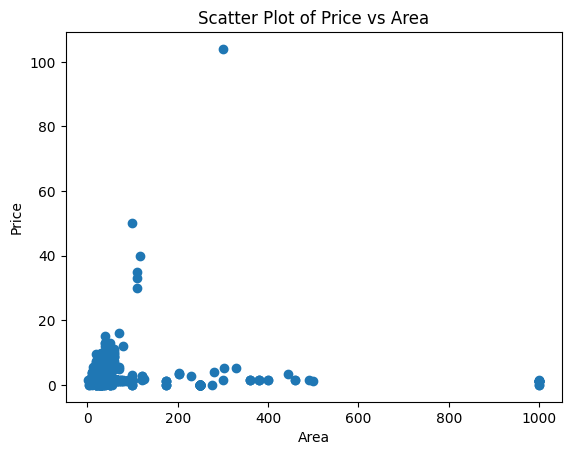

In [452]:
plt.scatter(df['area'], df['price'])
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Scatter Plot of Price vs Area')
plt.show()


# Data processing

In [453]:
# Change "quận 2" and "Quận 2 (Tp Thủ Đức)" to "Quận 2"
df['district'] = df['district'].replace('Quận 2 (Tp Thủ Đức)', 'Quận 2')

In [454]:
# Change province, ward, street from categorical to numerical value
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["district"] = le.fit_transform(df['district'])
df["province"] = le.fit_transform(df['province'])
df["ward"] = le.fit_transform(df['ward'])
df.head()

,price,province,district,ward,location_latitude,location_longitude,area
0,3.95,1,14,11,106.686146,10.745877,280.0
1,5.00,1,18,5,106.644039,10.845728,30.0
2,2.00,1,13,94,106.705338,10.729381,12.0
3,3.80,1,12,19,106.646393,10.742794,25.0
4,2.90,1,18,4,106.657982,10.855271,25.0


In [455]:
X = df.drop('price', axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

In [456]:
re_model = RandomForestRegressor(n_estimators=100, random_state=42)
re_model.fit(X_train, y_train)
y_pred = re_model.predict(X_test)
y_pred

array([ 2.85198789,  4.71350385,  3.72450113,  4.28458314,  3.96596508,
        4.28458314,  1.31213095,  3.66982568,  3.62426358,  2.369655  ,
        4.64595667,  4.09423532,  5.16598058,  3.06617375,  3.60033294,
        3.96596508,  3.86823929,  4.08947337,  3.21527127,  5.27633333,
        3.42721929,  3.99635815,  3.21536227,  4.54285833,  0.97320238,
        3.8423456 ,  2.89273333,  4.40716032,  3.77600505,  3.3960515 ,
        3.72450113,  3.62426358,  4.86777208,  3.8842085 ,  3.74555167,
        5.35709571,  4.15860169,  4.15532667,  3.65901841,  6.991     ,
        4.47429048,  5.17067476,  4.14864904,  3.54689641,  4.4609255 ,
        4.21783156,  4.04560185,  3.16339582,  3.05057524,  3.79756816,
       32.791     ,  3.75341189,  4.80050947,  3.779125  ,  3.37516577,
        4.1388    ,  1.79009857,  3.69905155,  4.71623015,  3.8349522 ,
        5.09253667,  3.96596508,  4.96773452,  3.16339582,  3.91629762,
        3.21368264,  3.06617375,  2.98489157,  3.96858125,  3.74

# Evaluation

In [457]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error

# Predict the target variable
y_pred = re_model.predict(X_test)

print('---Random Forest Regressor---')

# Calculate the MAE
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error (MAE):', mae)

# Calculate the MSE
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error (MSE):', mse)

# Calculate the RSqared
rsquared = r2_score(y_test, y_pred)
print('R-squared:', rsquared)

# Calculate the RMSE
rmse = np.sqrt(mse)
print('Root Mean Squared Error (RMSE):', rmse)


---Random Forest Regressor---
Mean Absolute Error (MAE): 0.7767243855553272
Mean Squared Error (MSE): 1.3844170768940645
R-squared: 0.6801364495263629
Root Mean Squared Error (RMSE): 1.1766125432333554


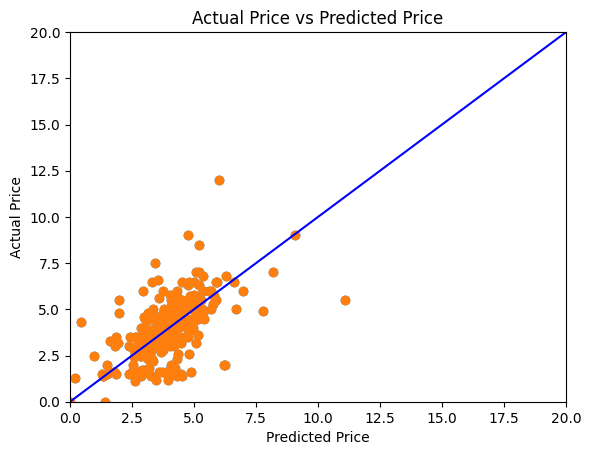

In [458]:
# do a scatter plot of the predicted price vs the actual price
plt.scatter(y_pred, y_test)
plt.ylabel('Actual Price')
import matplotlib.pyplot as plt



plt.scatter(y_pred, y_test)
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Actual Price vs Predicted Price')

limits = [np.min([plt.xlim(), plt.ylim()]),  # min of both axes
          np.max([plt.xlim(), plt.ylim()])]  # max of both axes

plt.plot(limits, limits, 'b-')  # 'b-' means blue color, solid line


plt.xlim(0, 20)
plt.ylim(0, 20)
plt.show()

# Conclusion
For now, the property_type are all "TPHCM or Thu Duc", so I buit the DT based on the districts and the ward and the area to predict the price based on these features. I will try to improve the pipeline to get  more feature when crawling others rentals website.

In [459]:
# Choose n_neighbors
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': np.arange(1, 50)}

knn = KNeighborsRegressor()
knn_cv = GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(X_train, y_train)

print(knn_cv.best_params_)

{'n_neighbors': 16}


In [460]:
knn_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [461]:
# # KNN Regressor
# knn_model = KNeighborsRegressor(n_neighbors=knn_cv.best_params_['n_neighbors'])
# knn_model.fit(X_train, y_train)
y_pred = knn_cv.predict(X_test)
y_pred

array([ 2.95     ,  4.8999375,  3.6686875,  4.71875  ,  4.01875  ,
        4.71875  ,  2.5874375,  3.70625  ,  3.521875 ,  2.678125 ,
        3.8249375,  4.00625  ,  4.9186875,  3.024375 ,  3.5686875,
        4.01875  ,  3.80625  ,  3.80625  ,  3.26875  ,  4.3625   ,
        4.9311875,  3.95     ,  3.2498125,  3.6249375,  2.23125  ,
        4.1125   ,  3.675    ,  3.61875  ,  3.74375  ,  3.54375  ,
        3.6686875,  3.521875 ,  5.14375  ,  3.95625  ,  4.5555625,
        5.33125  ,  4.24375  ,  3.7375   ,  3.5499375,  5.6686875,
        3.46875  ,  4.3311875,  4.01875  ,  3.643625 ,  5.00625  ,
        4.5749375,  4.0375   ,  3.2      ,  2.8125   ,  3.756125 ,
       12.16875  ,  4.0249375,  4.8875   ,  2.721875 ,  3.3249375,
        4.8625   ,  3.75     ,  3.94375  ,  4.56875  ,  3.6061875,
        3.9625   ,  4.01875  ,  4.6374375,  3.2      ,  3.34375  ,
        3.70625  ,  3.024375 ,  2.7686875,  3.8436875,  3.6436875,
        3.1686875,  3.80625  ,  4.38125  ,  3.70625  ,  3.1686

In [462]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print('---KNN Regressor---')

# Calculate the MAE
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error (MAE):', mae)

# Calculate the MSE
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error (MSE):', mse)

# Calculate the RSqared
rsquared = r2_score(y_test, y_pred)
print('R-squared:', rsquared)

# Calculate the RMSE
rmse = np.sqrt(mse)
print('Root Mean Squared Error (RMSE):', rmse)

---KNN Regressor---
Mean Absolute Error (MAE): 0.8768069852941177
Mean Squared Error (MSE): 2.60798470518257
R-squared: 0.39743646527955123
Root Mean Squared Error (RMSE): 1.6149256036061135


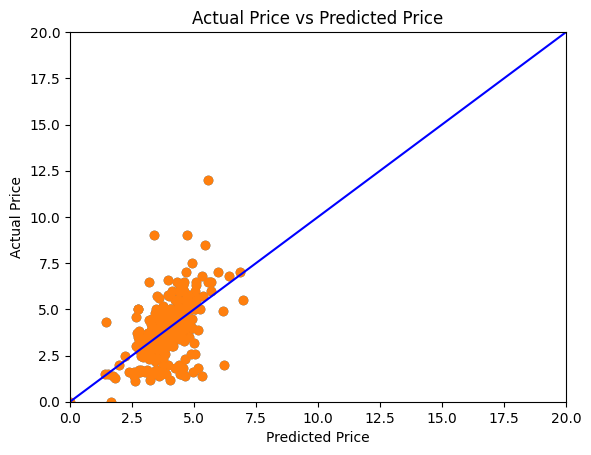

In [463]:
# do a scatter plot of the predicted price vs the actual price
plt.scatter(y_pred, y_test)
plt.ylabel('Actual Price')
import matplotlib.pyplot as plt

plt.scatter(y_pred, y_test)
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Actual Price vs Predicted Price')

limits = [np.min([plt.xlim(), plt.ylim()]),  # min of both axes
          np.max([plt.xlim(), plt.ylim()])]  # max of both axes

plt.plot(limits, limits, 'b-')  # 'b-' means blue color, solid line


plt.xlim(0, 20)
plt.ylim(0, 20)
plt.show()